In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import csv
import cv2
import os
from numpy import genfromtxt
import requests
import re
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
def CSV_To_Dataframe(letter, start, end, step):
    path = "./ASL_CSV/train/"
    data = []
    for num in range(start, end, step):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',sep=',',header= None)
        array = df.to_numpy()
        result = array.flatten()
        
        arr = []
        for x in result:
            replaced = re.sub("[^0-9 ]+", "", x)
            replaced = re.sub(' +', ' ', replaced).strip()
            replaced = replaced.split(" ")
            replaced = [(eval(i)/255) for i in replaced]
            arr.append(replaced)
        
        data.append(arr)
    np_data = np.array(data)
    return np_data

In [5]:
letter_to_num = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
    'd' : 4,
    'e' : 5,
    'f' : 6,
    'g' : 7,
    'h' : 8,
    'i' : 9,
    'j' : 10,
    'k' : 11,
    'l' : 12,
    'm' : 13,
    'n' : 14,
    'o' : 15,
    'p' : 16,
    'q' : 17,
    'r' : 18,
    's' : 19,
    't' : 20,
    'u' : 21,
    'v' : 22,
    'w' : 23,
    'x' : 24,
    'y' : 25,
    'z' : 26,
}

In [15]:
def create_data_zigzag(letters, start, end, step):
    data_1 = np.concatenate([CSV_To_Dataframe(x, start, end, step) for x in letters])
    data_2 = np.concatenate([CSV_To_Dataframe(x, start+1, end, step) for x in letters])
    data_3 = np.concatenate([CSV_To_Dataframe(x, start+2, end, step) for x in letters])
    data_train = np.concatenate([data_1, data_3])
    data_test = data_2

    test_labels = []
    train_labels = []

    for i in range(1,27):
        for j in range(200):
            train_labels.append(i)
    train_labels = np.array(train_labels)


    for i in range(1,27):
        for j in range(100):
            test_labels.append(i)
    test_labels = np.array(test_labels)

    return data_train, data_test, train_labels, test_labels

master_df, test_df, master_labels, test_labels = create_data_zigzag("abcdefghijklmnopqrstuvwxyz", 1040, 1050, 3) 


In [9]:
def create_data(letters, start, end):
    data = np.concatenate([CSV_To_Dataframe(x, start, end) for x in letters])
    labels = []
    for letter in letters:
        labels = labels + ([[letter_to_num[letter]]]*(end-start))
    labels = np.array(labels)
    return data, labels

master_df, master_labels = create_data("abcdefghijklmnopqrstuvwxyz", 1, 11) 
test_df, test_labels = create_data("abcdefghijklmnopqrstuvwxyz", 501, 511)

In [6]:
print(master_df.shape)
print(test_df.shape)
""" master_labels = []
test_labels = []
for i in range(1,27):
    for j in range(100):
        test_labels.append(i) """
test_labels = np.array(test_labels)

print(test_labels.shape)
""" for i in range(1,27):
    for j in range(200):
        master_labels.append(i)
master_labels = np.array(master_labels) """

print(master_labels.shape)
print(test_labels)


(5200, 200, 200)
(2600, 200, 200)
(2600,)
(5200,)
[ 1  1  1 ... 26 26 26]


In [7]:

np.save("master_numpy_601_901", master_df)
np.save("test_numpy_601_901", test_df)
np.save("master_labels_numpy_601_901", master_labels)
np.save("test_labels_numpy_601_901", test_labels)


In [8]:
master = np.load("master_numpy_601_901.npy", allow_pickle = True)
test = np.load("test_numpy_601_901.npy", allow_pickle = True)
master_labels = np.load("master_labels_numpy_601_901.npy", allow_pickle = True)
test_labels = np.load("test_labels_numpy_601_901.npy", allow_pickle = True)


In [3]:
master1 = np.load("master_numpy_1_300.npy", allow_pickle = True)
test1 = np.load("test_numpy_1_300.npy", allow_pickle = True)
master_labels1 = np.load("master_labels_numpy_1_300.npy", allow_pickle = True)
test_labels1 = np.load("test_labels_numpy_1_300.npy", allow_pickle = True)

master2 = np.load("master_numpy_301_601.npy", allow_pickle = True)
test2 = np.load("test_numpy_301_601.npy", allow_pickle = True)
master_labels2 = np.load("master_labels_numpy_301_601.npy", allow_pickle = True)
test_labels2 = np.load("test_labels_numpy_301_601.npy", allow_pickle = True)

master = np.concatenate([master1, master2])
test = np.concatenate([test1, test2])
master_label = np.concatenate([master_labels1, master_labels2])
test_label = np.concatenate([test_labels1, test_labels2])

In [6]:
np.save("master_numpy_1_601", master)
np.save("test_numpy_1_601", test)
np.save("master_labels_numpy_1_601", master_label)
np.save("test_labels_numpy_1_601", test_label)

In [2]:
master = np.load("master_numpy_1_601.npy", allow_pickle = True)
test = np.load("test_numpy_1_601.npy", allow_pickle = True)
master_labels = np.load("master_labels_numpy_1_601.npy", allow_pickle = True)
test_labels = np.load("test_labels_numpy_1_601.npy", allow_pickle = True)

In [19]:
print(test_label.shape)

(5200,)


In [3]:
print(master.shape)
print(master_labels.shape)
print(test.shape)
print(test_labels.shape)

(10400, 200, 200)
(10400,)
(5200, 200, 200)
(5200,)


In [21]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, input_shape=(200,200)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation = 'relu'))
# model.add(keras.layers.Dense(32, activation = 'sigmoid'))
model.add(keras.layers.Dense(124))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(27, activation = 'softmax'))


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

model.summary()

history = model.fit(
    master, master_label, validation_data=(test, test_label), batch_size=36, epochs=15
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               120400    
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 124)               12524     
                                                                 
 dense_7 (Dense)             (None, 64)                8000      
                                                                 
 dense_8 (Dense)             (None, 27)                1755      
                                                      

163/163 - 6s - loss: 12.3415 - accuracy: 0.0113 - 6s/epoch - 40ms/step


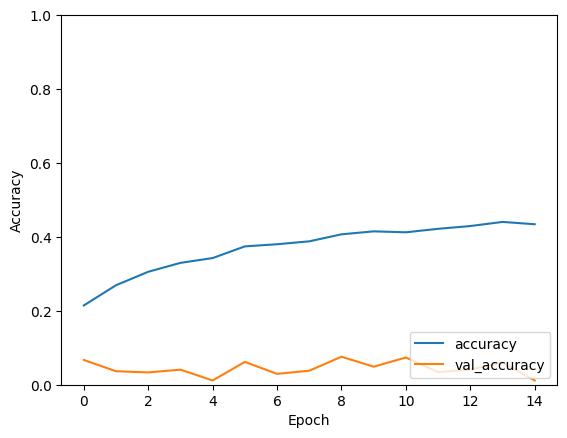

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_label, verbose=2)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(master, master_labels, epochs=7, 
                    validation_data=(test, test_labels))

Epoch 1/7
325/325 [==============================] - 137s 420ms/step - loss: 2.3200 - accuracy: 0.2104 - val_loss: 6.7005 - val_accuracy: 0.0385
Epoch 2/7
325/325 [==============================] - 135s 414ms/step - loss: 1.4164 - accuracy: 0.3714 - val_loss: 9.6500 - val_accuracy: 0.0373
Epoch 3/7
325/325 [==============================] - 137s 420ms/step - loss: 1.1640 - accuracy: 0.4175 - val_loss: 11.4464 - val_accuracy: 0.0204
Epoch 4/7
325/325 [==============================] - 137s 421ms/step - loss: 1.0100 - accuracy: 0.4553 - val_loss: 12.0492 - val_accuracy: 0.0115
Epoch 5/7
325/325 [==============================] - 136s 418ms/step - loss: 0.9175 - accuracy: 0.4690 - val_loss: 12.6099 - val_accuracy: 0.0315
Epoch 6/7
325/325 [==============================] - 135s 414ms/step - loss: 0.8549 - accuracy: 0.4797 - val_loss: 13.6697 - val_accuracy: 0.0073
Epoch 7/7
325/325 [==============================] - 135s 416ms/step - loss: 0.8124 - accuracy: 0.4865 - val_loss: 13.5543 - v

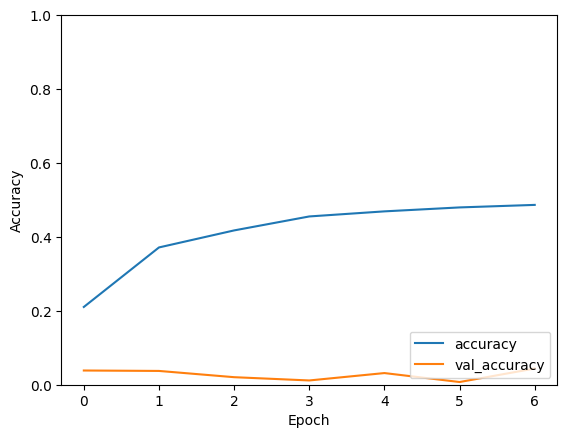

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [6]:
## Convert Image Size and save them

def convert_image_size_64(letter, start, end, step):
    path = "./ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/"
    new_path = "./ASL_CSV_64/train/"

    for num in range(start, end, step):
        image = Image.open(path+letter+'/'+letter+str(num)+'.jpg')
        new_image = image.resize((64,64))
        new_image.save(new_path+letter+'/'+letter+str(num)+'.jpg')
        
    return 0


for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    convert_image_size_64(letter, 1, 3001, 1)